# PyTorch CNN Example

### Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

### Import Data

In [2]:
image_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
train_set = torchvision.datasets.CIFAR10(root=os.path.join(os.getcwd(), '../data/CIFAR10'), train=True, download=True, transform=image_transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


In [3]:
test_set = torchvision.datasets.CIFAR10(root=os.path.join(os.getcwd(), '../data/CIFAR10'), train=False, download=True, transform=image_transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


In [4]:
CLASSES = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### EDA

In [5]:
def img_show(img):
    img = img / 2 + 0.5
    np_img = img.numpy()
    plt.imshow(np_img.transpose(1, 2, 0))
    plt.show()

In [6]:
data_iter = iter(train_loader)
images, labels = data_iter.next()

truck


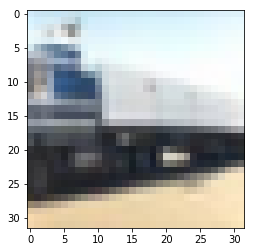

dog


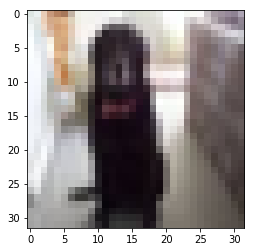

cat


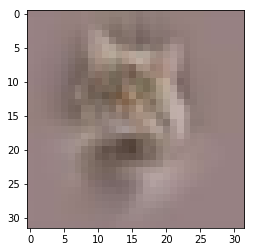

truck


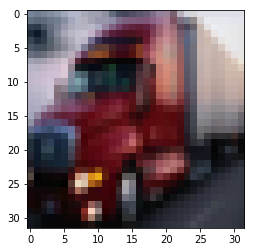

In [7]:
for i in range(len(images)):
    print(CLASSES[labels[i]])
    img_show(images[i])

### Train Model

In [8]:
class Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=(5, 5))
        self.lin1 = nn.Linear(12*14*14, 80)
        self.lin2 = nn.Linear(80, 10)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = x.view(-1, 12*14*14)
        x = F.relu(self.lin1(x))
        return self.lin2(x)

In [9]:
net = Net()
net

Net(
  (conv1): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1))
  (lin1): Linear(in_features=2352, out_features=80, bias=True)
  (lin2): Linear(in_features=80, out_features=10, bias=True)
)

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [11]:
for epoch in range(2):
    total_loss = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        if i > 0 and i % 1000 == 0:
            print(f'Epoch: {epoch}, Mini-Batch: {i}, Average Loss: {round(total_loss / 1000, 3)}')
            total_loss = 0

Epoch: 0, Mini-Batch: 1000, Average Loss: 2.027
Epoch: 0, Mini-Batch: 2000, Average Loss: 1.724
Epoch: 0, Mini-Batch: 3000, Average Loss: 1.568
Epoch: 0, Mini-Batch: 4000, Average Loss: 1.509
Epoch: 0, Mini-Batch: 5000, Average Loss: 1.466
Epoch: 0, Mini-Batch: 6000, Average Loss: 1.427
Epoch: 0, Mini-Batch: 7000, Average Loss: 1.433
Epoch: 0, Mini-Batch: 8000, Average Loss: 1.393
Epoch: 0, Mini-Batch: 9000, Average Loss: 1.422
Epoch: 0, Mini-Batch: 10000, Average Loss: 1.361
Epoch: 0, Mini-Batch: 11000, Average Loss: 1.379
Epoch: 0, Mini-Batch: 12000, Average Loss: 1.332
Epoch: 1, Mini-Batch: 1000, Average Loss: 1.271
Epoch: 1, Mini-Batch: 2000, Average Loss: 1.237
Epoch: 1, Mini-Batch: 3000, Average Loss: 1.251
Epoch: 1, Mini-Batch: 4000, Average Loss: 1.233
Epoch: 1, Mini-Batch: 5000, Average Loss: 1.234
Epoch: 1, Mini-Batch: 6000, Average Loss: 1.232
Epoch: 1, Mini-Batch: 7000, Average Loss: 1.217
Epoch: 1, Mini-Batch: 8000, Average Loss: 1.189
Epoch: 1, Mini-Batch: 9000, Average L

### Test Model

Actual: ship, Predicted: plane


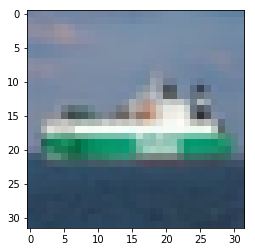

Actual: dog, Predicted: cat


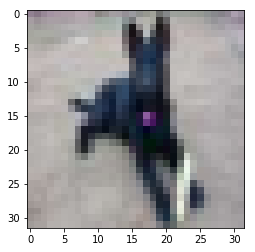

Actual: cat, Predicted: horse


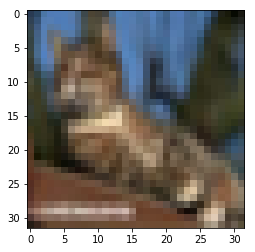

Actual: dog, Predicted: dog


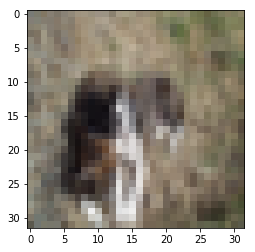

In [12]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

outputs = net(images)
_, predicted = outputs.max(1)

for i in range(len(images)):
    print(f'Actual: {CLASSES[labels[i]]}, Predicted: {CLASSES[predicted[i]]}')
    img_show(images[i])

### Error Analysis

In [13]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}')

Accuracy: 58.34


In [14]:
correct = [0 for _ in range(len(CLASSES))]
total = [0 for _ in range(len(CLASSES))]
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = outputs.max(1)
        actual = list(labels.numpy())
        predictions = list(predicted.numpy())
        for i, class_index in enumerate(actual):
            total[class_index] += 1
            if predictions[i] == class_index:
                correct[class_index] += 1

for i, class_name in enumerate(CLASSES):
    print(f'Accuracy for {class_name}: {100 * correct[i] / total[i]}')

Accuracy for plane: 73.5
Accuracy for car: 73.7
Accuracy for bird: 28.3
Accuracy for cat: 52.4
Accuracy for deer: 48.1
Accuracy for dog: 52.1
Accuracy for frog: 48.6
Accuracy for horse: 71.2
Accuracy for ship: 70.2
Accuracy for truck: 65.3
